In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn import linear_model

In [7]:
turku_url = 'https://raw.githubusercontent.com/Mini-project-Team-Theta/team_theta/refs/heads/main/final/turku_df.csv'
turku_df = pd.read_csv(turku_url)

In [8]:
turku_df.head()

,Observation station,Year,Month,Day,Date,Snow depth mean [cm],Average temperature [°C],cloud_code,Global radiation mean [W/m2]
0,Turku airport,2004,1,1,2004-01-01,10.0,-8.6,NaN,14.0
1,Turku airport,2004,1,2,2004-01-02,10.0,-15.2,NaN,14.2
2,Turku airport,2004,1,3,2004-01-03,10.0,-10.9,NaN,11.0
3,Turku airport,2004,1,4,2004-01-04,10.0,-2.7,NaN,5.2
4,Turku airport,2004,1,5,2004-01-05,18.0,-4.5,NaN,6.1


In [9]:
turku_df["Date"] = pd.to_datetime(turku_df["Date"])
turku_df['day_of_year'] = turku_df['Date'].dt.dayofyear
turku_df.drop(columns=["Observation station"], inplace=True)

In [10]:
turku_df["Average temperature [°C]"] = turku_df["Average temperature [°C]"].interpolate()
turku_df["Global radiation mean [W/m2]"] = turku_df["Global radiation mean [W/m2]"].interpolate()
turku_df.loc[turku_df['cloud_code'].isnull(),'cloud_code'] = 9
turku_df.loc[turku_df['Snow depth mean [cm]'].isnull(),'Snow depth mean [cm]'] = 0

In [12]:
X = turku_df[["Average temperature [°C]", "Global radiation mean [W/m2]", "day_of_year", "cloud_code"]]
y = turku_df["Snow depth mean [cm]"]

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [14]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [15]:
y_pred = model.predict(X_test)

In [16]:
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f"R2: {r2}")
print(f"Mean Squared Error: {mse}")

R2: 0.35422669713372457
Mean Squared Error: 51.80372527801271


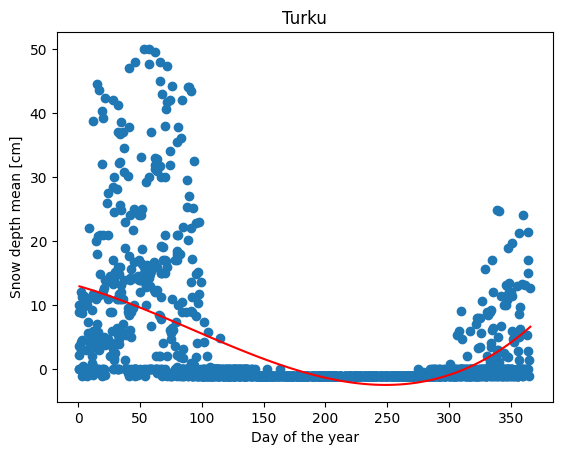

In [27]:
mymodel = np.poly1d(np.polyfit(X_train["day_of_year"], y_train, 3))

myline = np.linspace(1, 366, 100)


plt.scatter(X_test["day_of_year"], y_test)
plt.plot(myline, mymodel(myline), color='red')
plt.title('Turku')
plt.ylabel('Snow depth mean [cm]')
plt.xlabel('Day of the year')
plt.show()

In [24]:
snowdept = mymodel(range(7,21))
print(snowdept)

[12.60133933 12.54216234 12.48242166 12.42212402 12.36127615 12.29988479
 12.23795668 12.17549854 12.11251712 12.04901914 11.98501134 11.92050046
 11.85549324 11.7899964 ]


In [21]:
corr_matrix = turku_df.corr()

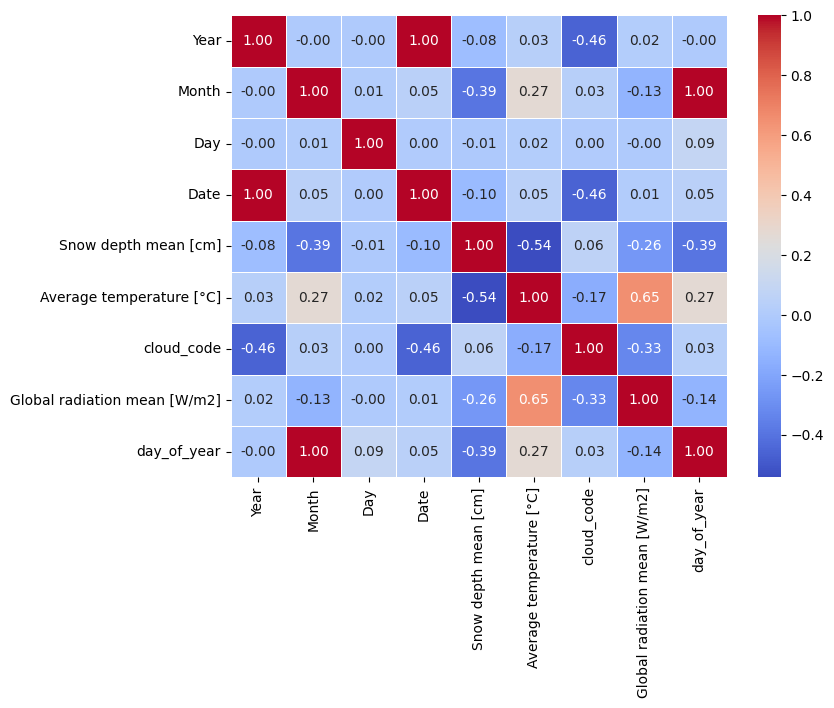

In [22]:
plt.figure(figsize=(8,6)) 
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)


plt.show()